In [17]:
#7. K-NN algorithm using Cross-Validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)

print(f'Optimal K: {optimal_k}')
print(f'Best Accuracy: {best_accuracy}')


Optimal K: 13
Best Accuracy: 0.9800000000000001


In [19]:
#6gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x= iris.data
y= iris.target

model = RandomForestClassifier()

param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2 , 5, 10],
 'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
 cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x,y)

print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [20]:
# 5. One Hot Encoding 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame with missing values
data = {
 'Color': ['Red', 'Blue', 'Green', None, 'Blue', 'Green', 'Red', None],
 'Size': ['S', 'M', 'L', 'M', 'L', None, 'S', 'L'],
 'Price': [10.5, 15.0, 20.0, 25.0, 30.0, 35.0, None, 40.0]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Drop rows with any missing values
df_cleaned = df.dropna()
print("\nDataFrame after dropping rows with missing values:\n", df_cleaned)

# Select categorical columns
categ_columns = ['Color', 'Size']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding
encoded_data = one_hot_encoder.fit_transform(df_cleaned[categ_columns])

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categ_columns))

# Concatenate the original DataFrame (excluding the encoded columns) with the encoded DataFrame
final_df = pd.concat([df_cleaned.drop(categ_columns, axis=1), encoded_df], axis=1)

print("\nDataFrame after one-hot encoding:\n", final_df)


Original DataFrame:
    Color  Size  Price
0    Red     S   10.5
1   Blue     M   15.0
2  Green     L   20.0
3   None     M   25.0
4   Blue     L   30.0
5  Green  None   35.0
6    Red     S    NaN
7   None     L   40.0

DataFrame after dropping rows with missing values:
    Color Size  Price
0    Red    S   10.5
1   Blue    M   15.0
2  Green    L   20.0
4   Blue    L   30.0

DataFrame after one-hot encoding:
    Price  Color_Green  Color_Red  Size_M  Size_S
0   10.5          0.0        1.0     0.0     1.0
1   15.0          0.0        0.0     1.0     0.0
2   20.0          1.0        0.0     0.0     0.0
4   30.0          NaN        NaN     NaN     NaN
3    NaN          0.0        0.0     0.0     0.0


In [21]:
#4. Support Vector Machine(SVM)
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


Accuracy:1.0


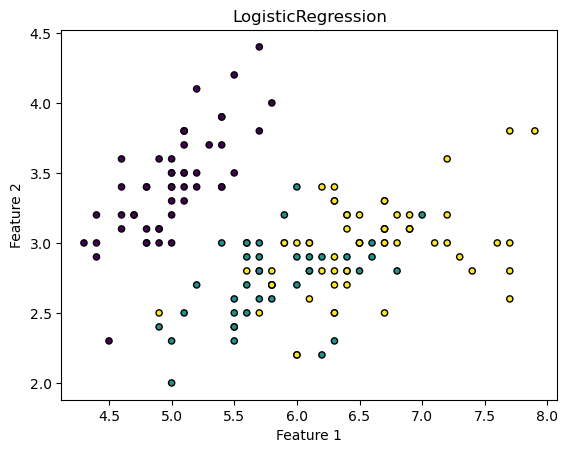


Classfication Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
#3 logisticRegression
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

accuracy= accuracy_score(y_pred,y_test)
print(f"Accuracy:{accuracy}")


plt.scatter(x[:,0],x[:,1] ,c=y , s=20 ,edgecolor='k')
plt.title('LogisticRegression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print('\nClassfication Report:\n')
print (classification_report(y_pred,y_test))
print('Confusion Matrix:',confusion_matrix(y_pred,y_test))


In [23]:
#1Perceptron:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, n=1000):
        self.weights = np.zeros(input_size)
        self.bias=0
        self.learning_rate = learning_rate
        self.n = n
        
    def activation_function(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation_function(z)
    
    def fit(self, X, y):
        for _ in range(self.n):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
                   
perceptron_model = Perceptron(input_size=2, learning_rate=0.1, n=1000)
perceptron_model.fit(X, y)
# Example prediction
                   
X_test = np.array([[1, 1]])
                   
prediction = perceptron_model.predict(X_test)
print(f"Input: {X_test} , Prediction: {prediction}")

Input: [[1 1]] , Prediction: 1


Training with learning rate: 0.1
Training with learning rate: 0.01
Training with learning rate: 0.001


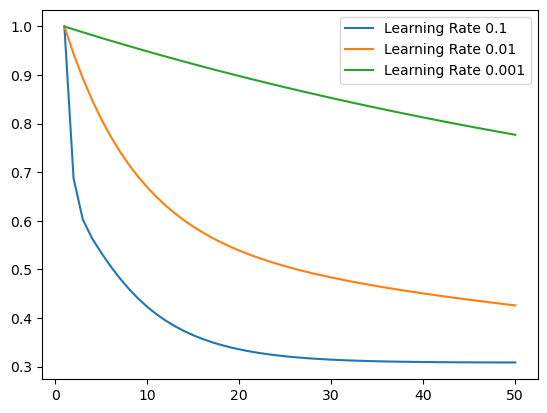

In [30]:
#2adaline:
import numpy as np
import matplotlib.pyplot as plt
class adaline:
    def __init__(self,inp,l=0.01,e=100):
        self.w=np.zeros(inp)
        self.b=0
        self.l=l
        self.e=e
        self.errors=[]
    def activation(self,z):
        return z
    def predict(self,x):
        z=np.dot(x,self.w)+self.b
        return self.activation(z)
    def fit(self,X,y):
        for _ in range(self.e):
            error_epoch=0
            for i in range(X.shape[0]):
                prediction=self.predict(X[i])
                error=y[i]-prediction
                self.w+=self.l*error*X[i]
                self.b+=self.l*error
                error_epoch+=(error**2)
            self.errors.append(error_epoch)
if __name__ == "__main__":
    X=np.array([[0,0],[0,1],[1,0],[1,1]])
    y=np.array([0,0,0,1])
    lr=[0.1,0.01,0.001]
    e=50
    for r in lr:
        print(f"Training with learning rate: {r}")
        a=adaline(inp=2,l=r,e=e)
        a.fit(X,y)
        plt.plot(range(1,1+e),a.errors, label=f'Learning Rate {r}')
    plt.legend()
    plt.show()